In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data
country = 'sierraleone'  # change to your country name
file_path = f'../data/sierraleone-raw.csv'

# Read the CSV file
df = pd.read_csv(file_path)
print('Data loaded successfully')
print('Data shape:', df.shape)
df.head()


Data loaded successfully
Data shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
# 2. Check basic info
print('\nBasic Information:')
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

In [3]:
# 3. Summary statistics
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [4]:
# 4. Missing values
print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
# 5. Handle missing values (fill with median)
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f'Filled missing values in {col} with median {median_value}')

Filled missing values in GHI with median 0.3
Filled missing values in DNI with median -0.1
Filled missing values in DHI with median -0.1
Filled missing values in ModA with median 3.6
Filled missing values in ModB with median 3.4
Filled missing values in WS with median 0.8
Filled missing values in WSgust with median 1.6


In [6]:
# 6. Detect outliers using Z-score
from scipy import stats
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in cols_to_check:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].fillna(df[col].median())))
        outliers = (z_scores > 3)
        print(f'{col}: {outliers.sum()} outliers found')

GHI: 2477 outliers found
DNI: 7586 outliers found
DHI: 2986 outliers found
ModA: 1604 outliers found
ModB: 2041 outliers found
WS: 3967 outliers found
WSgust: 3665 outliers found


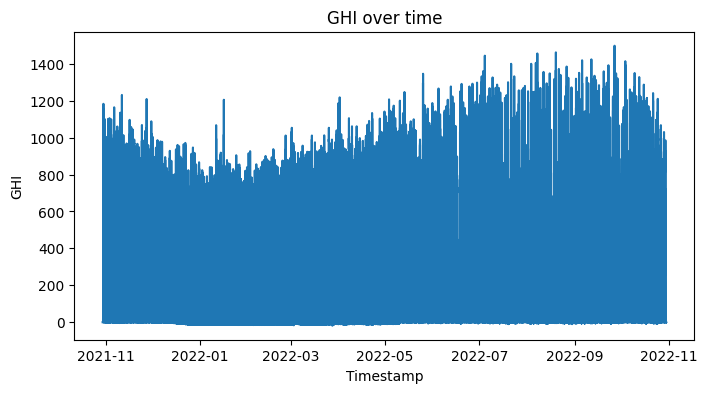

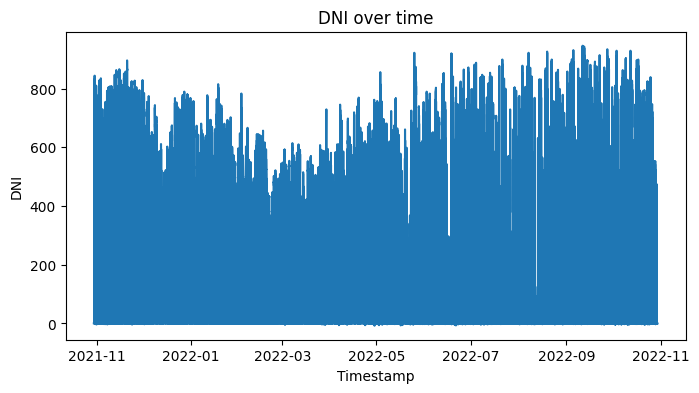

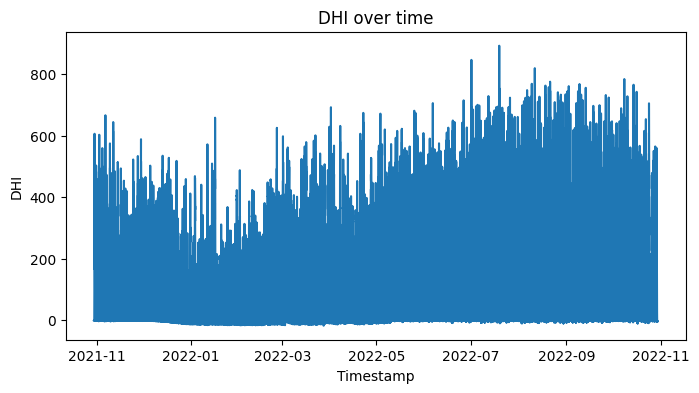

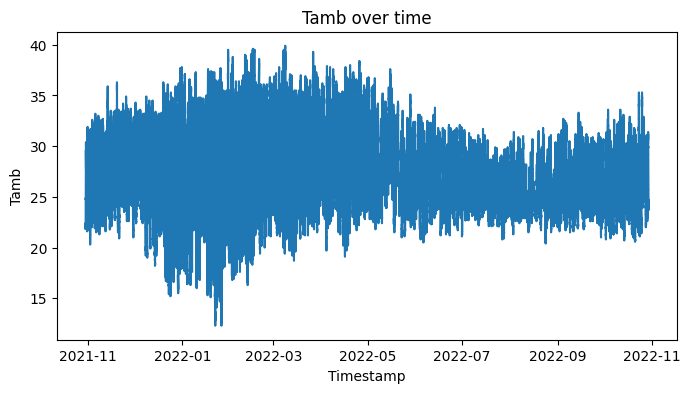

In [7]:
# 7. Simple plots
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')

    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            plt.plot(df['Timestamp'], df[col])
            plt.title(f'{col} over time')
            plt.xlabel('Timestamp')
            plt.ylabel(col)
            plt.show()

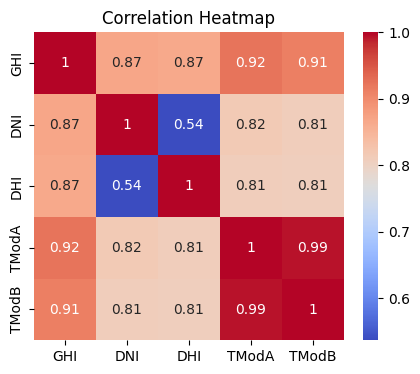

In [8]:
# 8. Correlation heatmap
import seaborn as sns
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

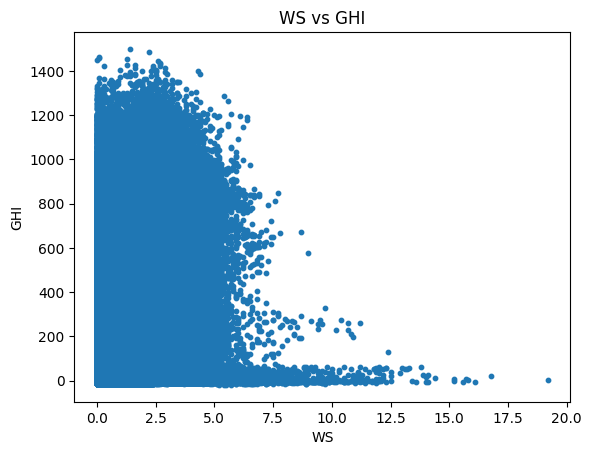

In [9]:
# 9. Scatter example (WS vs GHI)
if 'WS' in df.columns and 'GHI' in df.columns:
    plt.scatter(df['WS'], df['GHI'], s=10)
    plt.xlabel('WS')
    plt.ylabel('GHI')
    plt.title('WS vs GHI')
    plt.show()

In [10]:
# 10. Save cleaned data
output_file = f'../data/sierraleone_clean.csv'
df.to_csv(output_file, index=False)
print('Cleaned data saved to', output_file)

Cleaned data saved to ../data/sierraleone_clean.csv
